In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
from datetime import datetime, timedelta
import cartopy.crs as ccrs

<br>

<h3 align="left">Reading in the data</h3>

In [2]:
def read_netCDF4_data(filename):
    with Dataset(filename) as rootgrp:
        latitude = rootgrp['latitude'][:]
        longitude = rootgrp['longitude'][:]
        level = rootgrp['level'][:]
        time = rootgrp['time'][:]
        specific_humidity = rootgrp['q'][:][:][:][:]
        temperature = rootgrp['t'][:][:][:][:]
    return latitude, longitude, level, time, specific_humidity, temperature

In [3]:
latitude, longitude, level, time, specific_humidity, temperature = read_netCDF4_data("/home/jaminkiukkonen/Downloads/test_data.nc")

In [4]:
arr = read_netCDF4_data("/home/jaminkiukkonen/Downloads/test_data.nc")

<br>

<h3 align="left">Exploring the features</h3>

In [5]:
for array in arr:
    print(f'Type: {type(array)}\nDims: {array.ndim}\nShape: {array.shape}\nSize: {array.size}\nDtype: {array.dtype}')
    print()

Type: <class 'numpy.ma.core.MaskedArray'>
Dims: 1
Shape: (721,)
Size: 721
Dtype: float32

Type: <class 'numpy.ma.core.MaskedArray'>
Dims: 1
Shape: (1440,)
Size: 1440
Dtype: float32

Type: <class 'numpy.ma.core.MaskedArray'>
Dims: 1
Shape: (37,)
Size: 37
Dtype: int32

Type: <class 'numpy.ma.core.MaskedArray'>
Dims: 1
Shape: (7,)
Size: 7
Dtype: int32

Type: <class 'numpy.ma.core.MaskedArray'>
Dims: 4
Shape: (7, 37, 721, 1440)
Size: 268904160
Dtype: float64

Type: <class 'numpy.ma.core.MaskedArray'>
Dims: 4
Shape: (7, 37, 721, 1440)
Size: 268904160
Dtype: float64



<br>

- *Step size* for **latitude** is 0.25: $\quad$ 90, 89.75, 89.5, ..., 0, ..., -89.5, -89.75, -90
- **latitude** ranges from -90 to 90 (units: *degrees_north*) 

- *Step size* for **longitude** is 0.25: $\quad$ 0, 0.25, 0,5, ..., 359.25, 359.5, 359.75
- **longitude** ranges from 0 to 359.75 (units: *degrees_east*)

<br>

<h3 align="left">Converting hours to date</h3>

In [7]:
dates = []
for h in time:
    base_date = datetime(1900, 1, 1, 0, 0, 0)
    time_delta = timedelta(hours=int(h))
    resulting_date = base_date + time_delta
    dates.append(resulting_date)

In [8]:
dates

[datetime.datetime(2023, 6, 1, 10, 0),
 datetime.datetime(2023, 6, 5, 10, 0),
 datetime.datetime(2023, 6, 10, 10, 0),
 datetime.datetime(2023, 6, 15, 10, 0),
 datetime.datetime(2023, 6, 20, 10, 0),
 datetime.datetime(2023, 6, 25, 10, 0),
 datetime.datetime(2023, 6, 30, 10, 0)]

<br>

<h3 align="left">Cartopy library</h3>

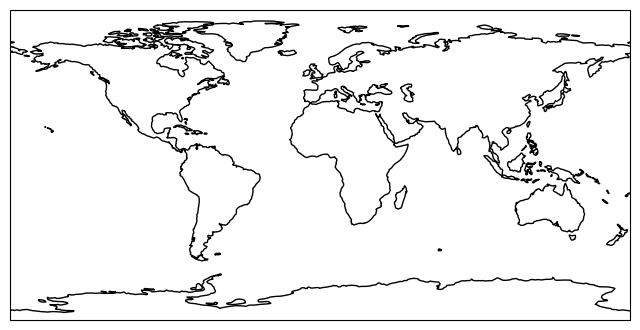

In [6]:
plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines();

<br>

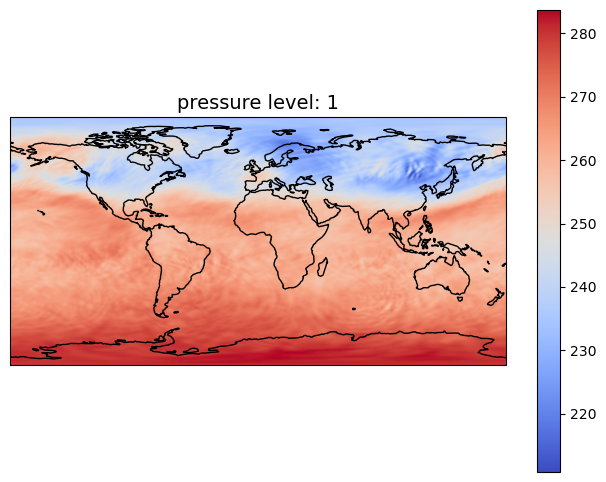

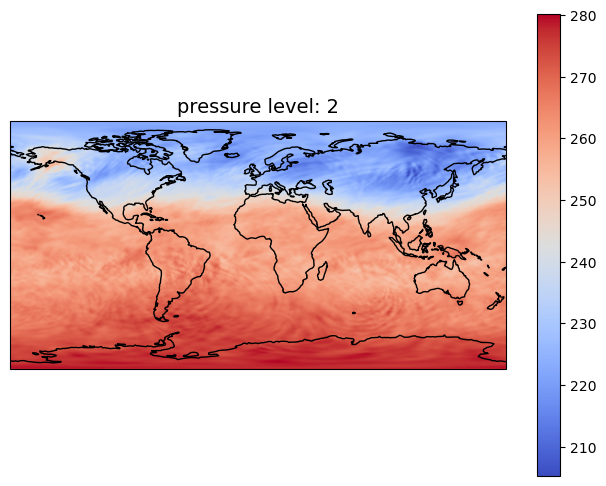

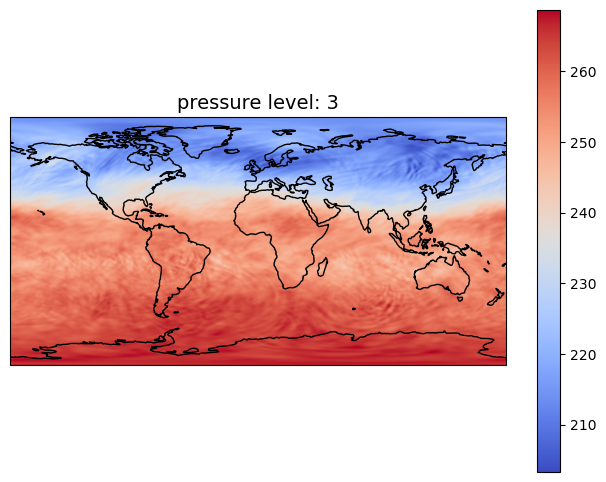

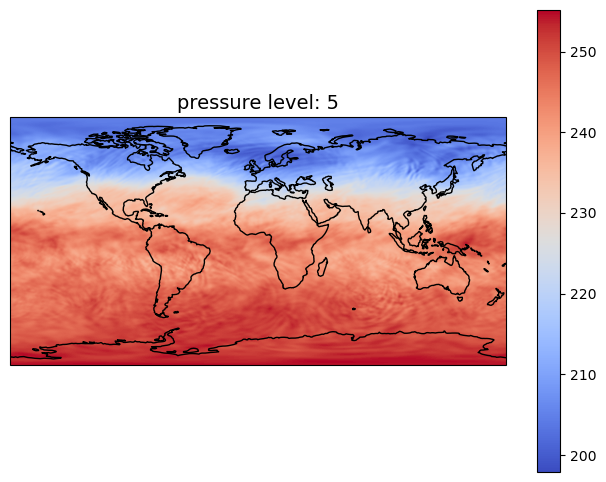

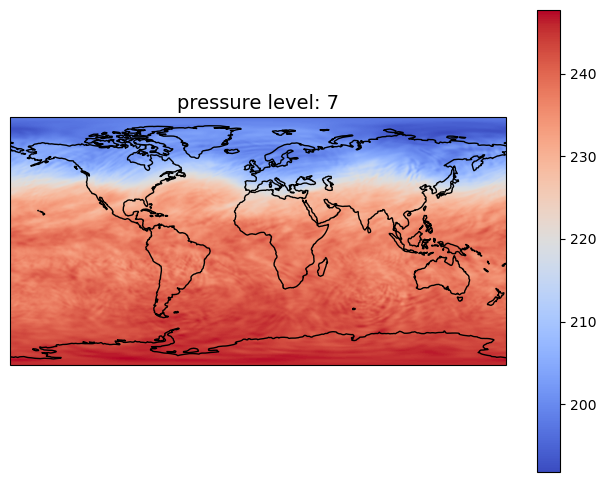

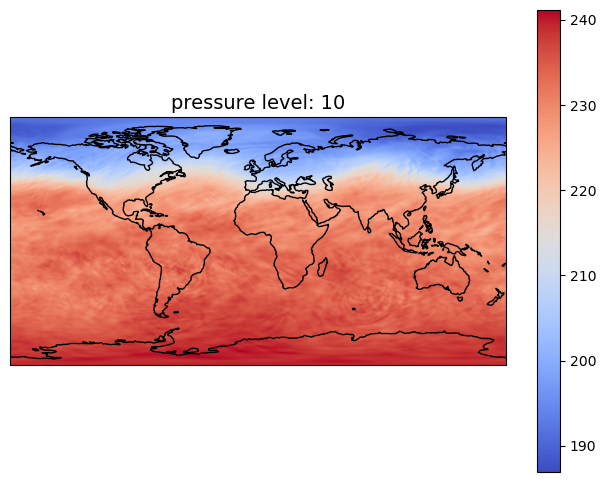

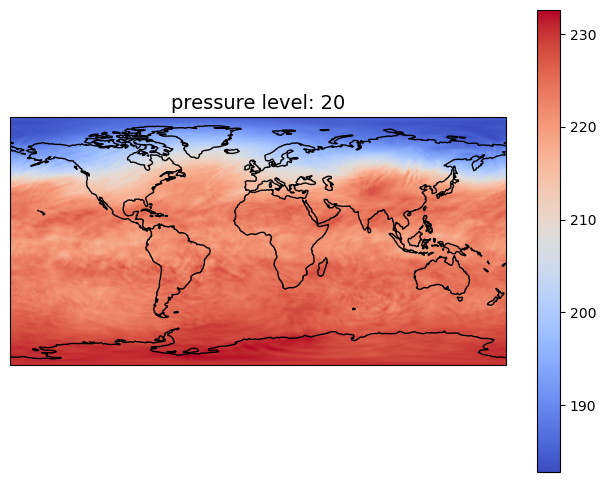

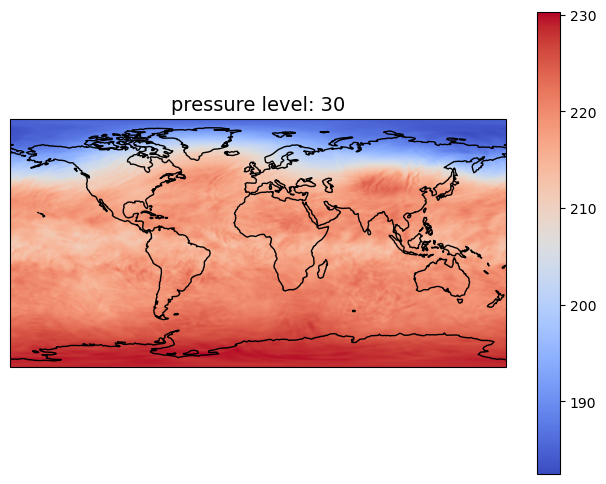

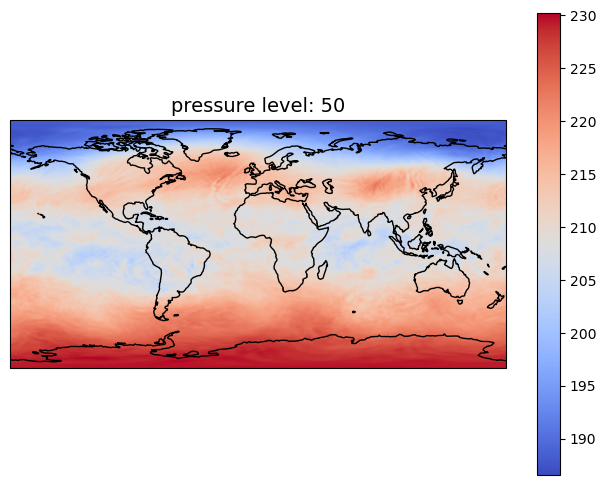

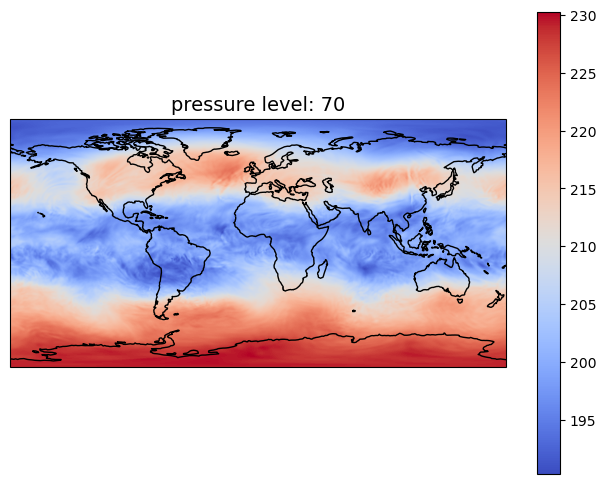

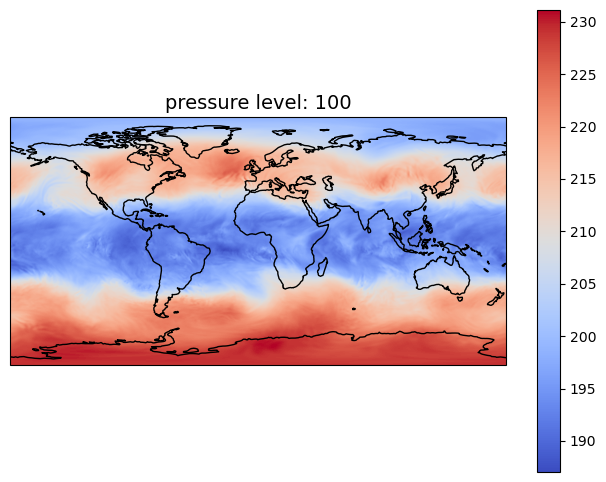

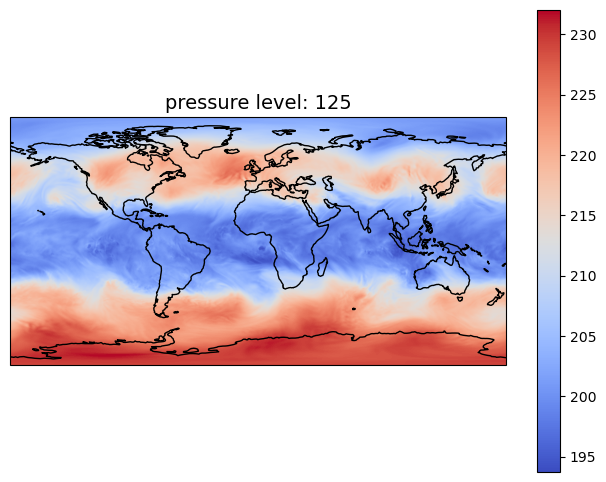

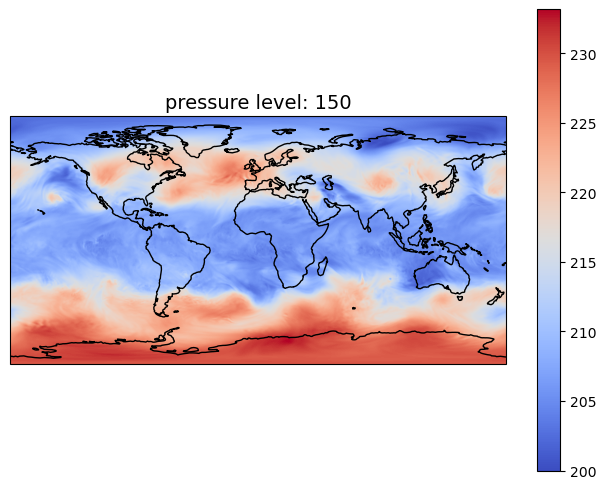

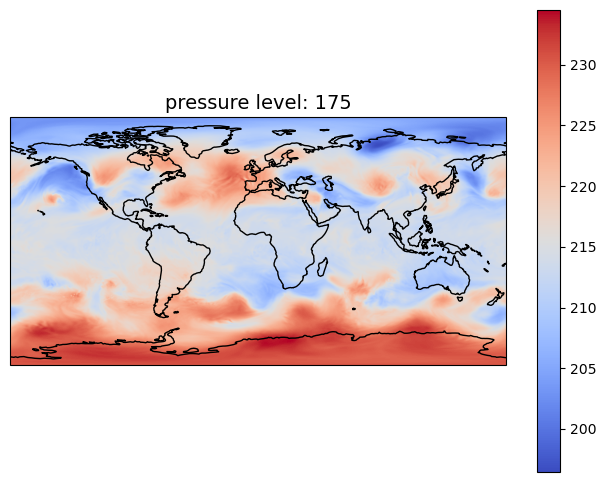

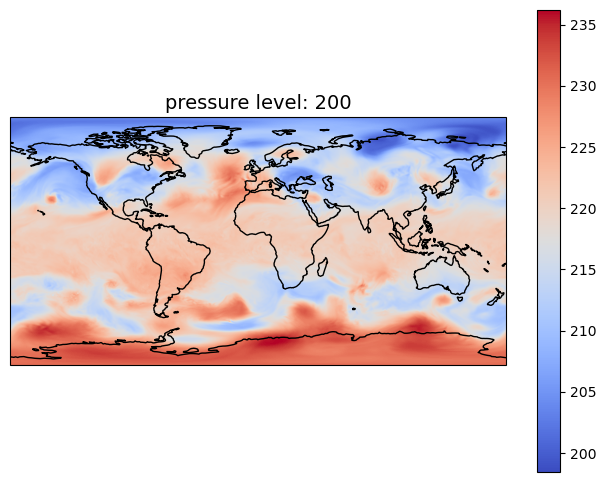

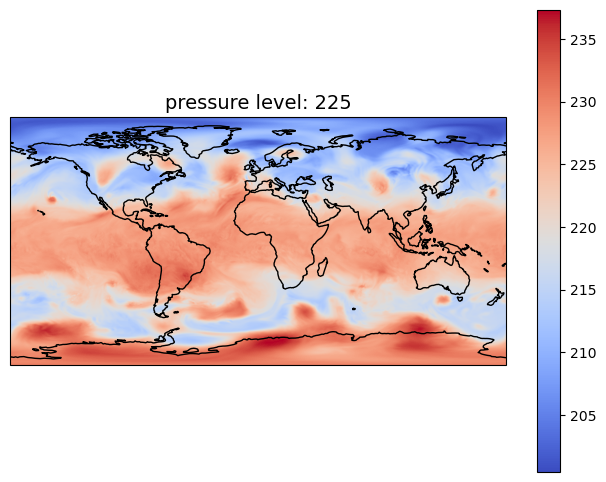

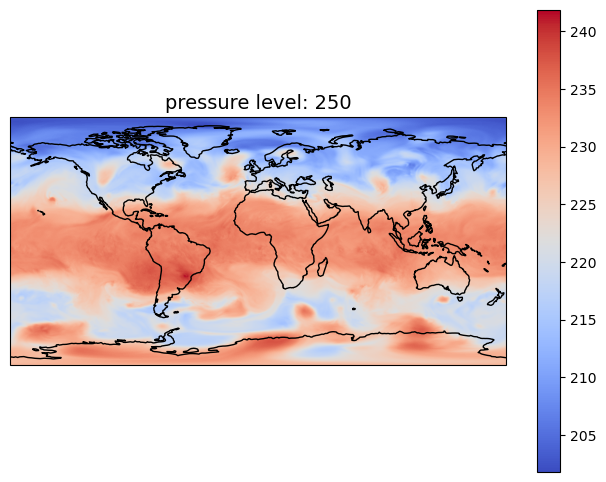

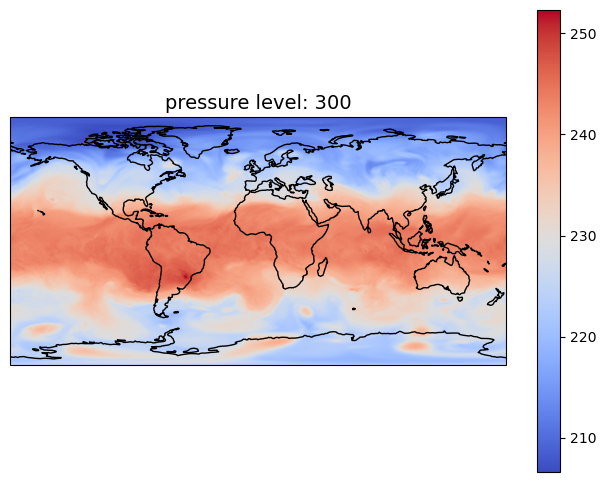

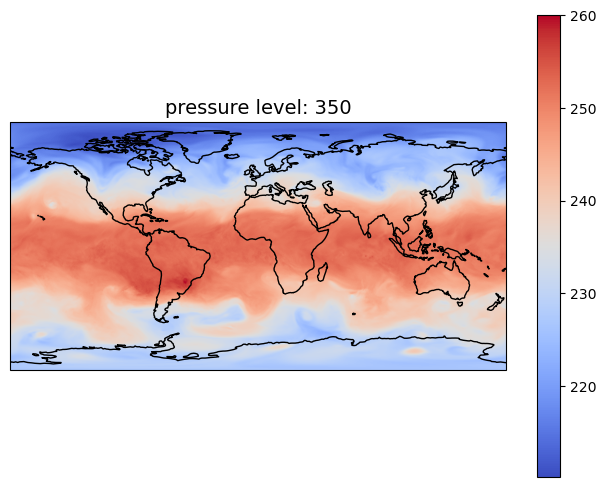

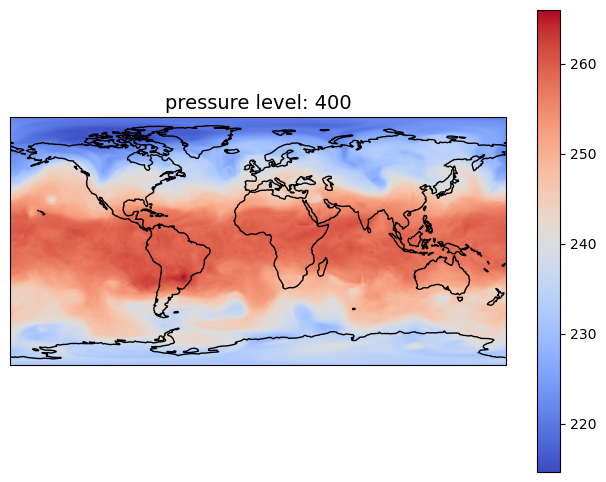

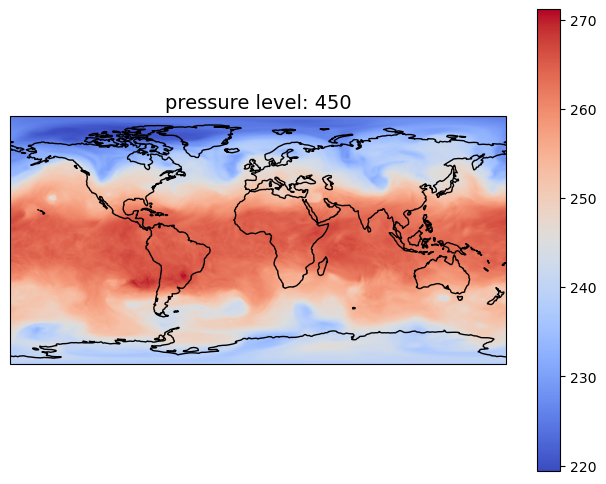

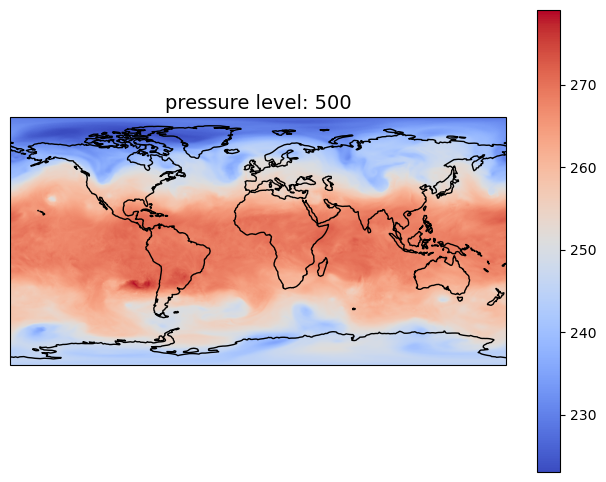

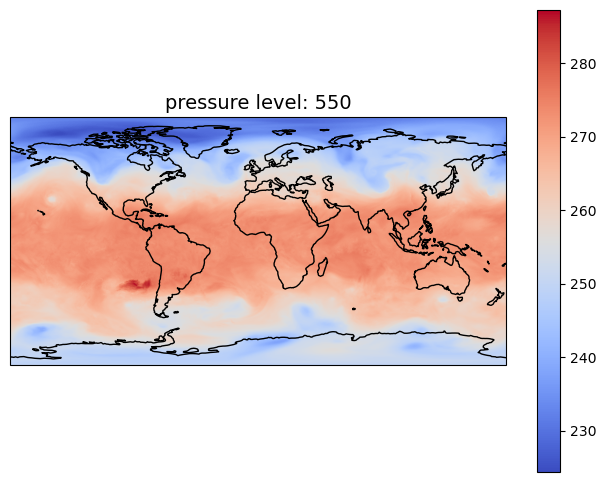

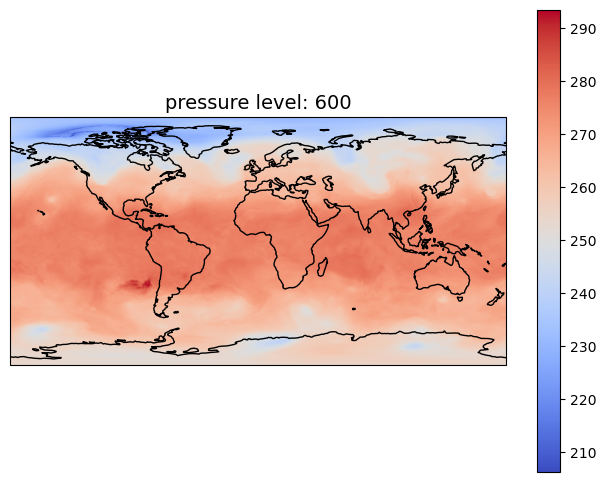

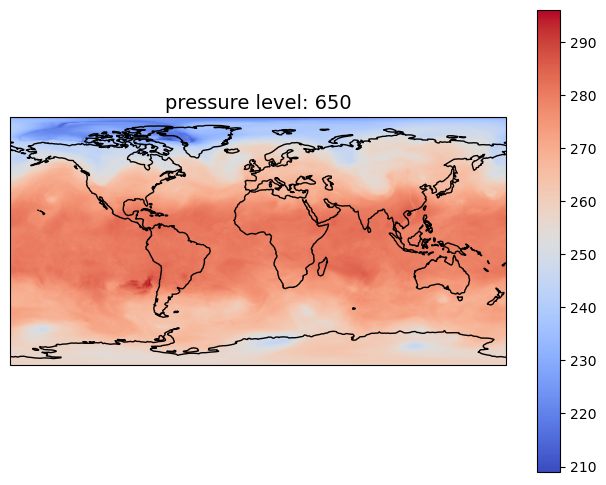

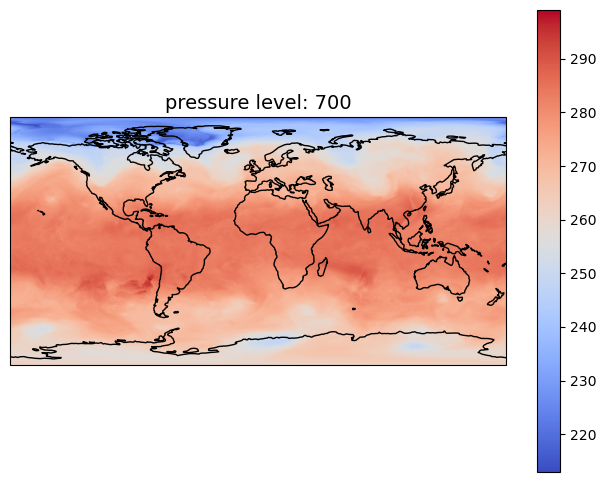

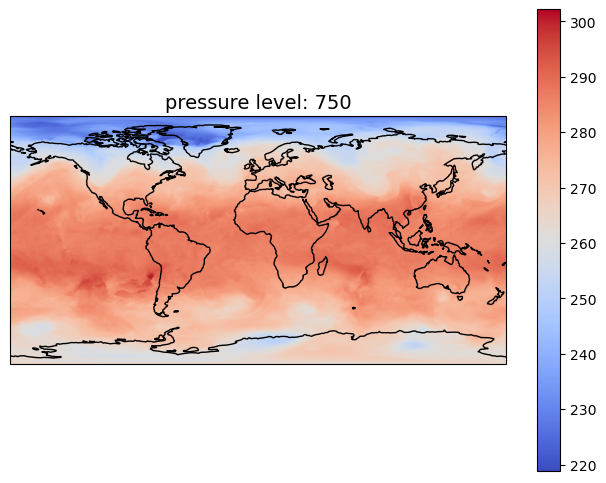

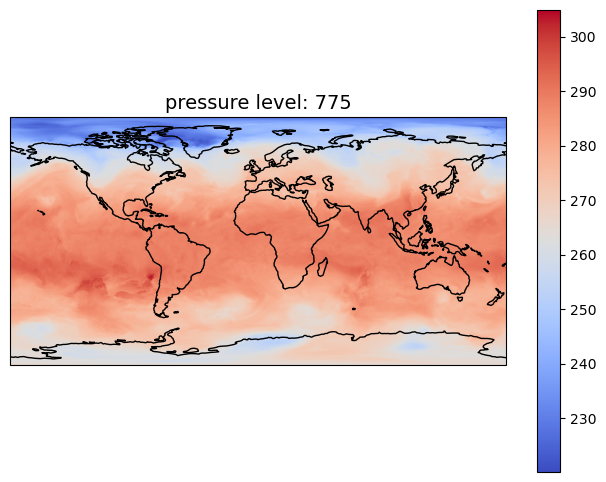

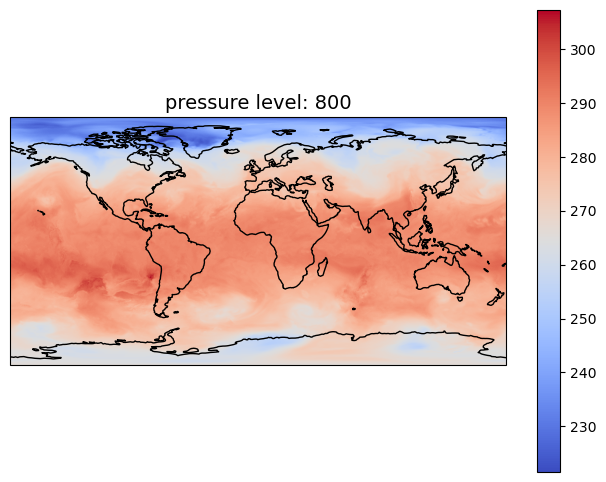

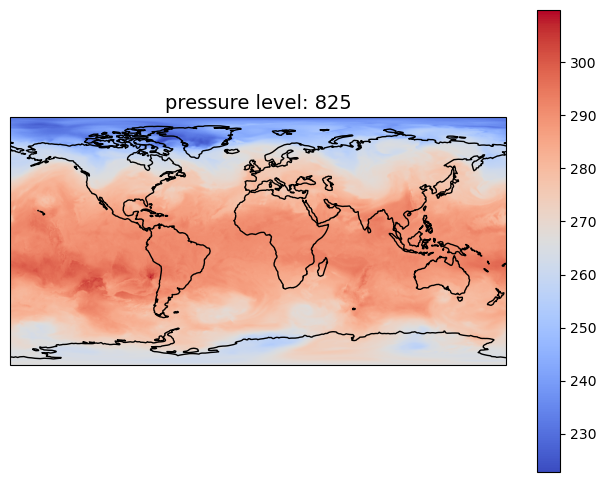

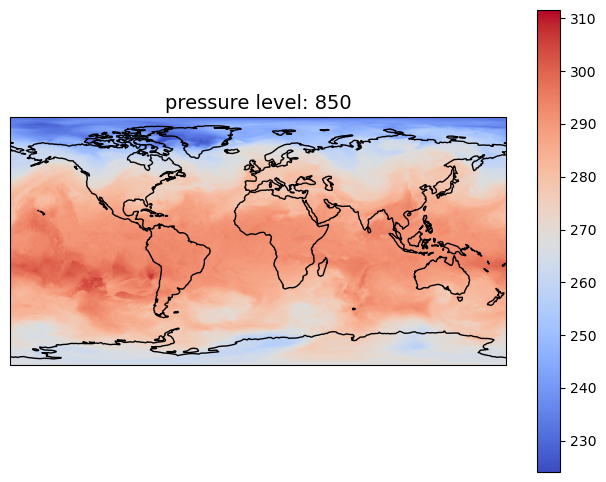

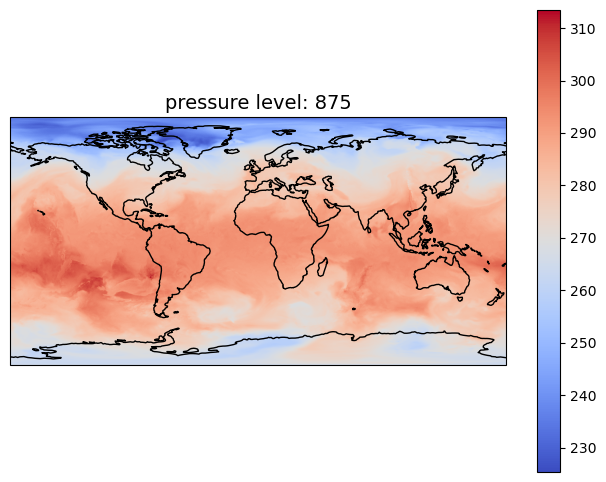

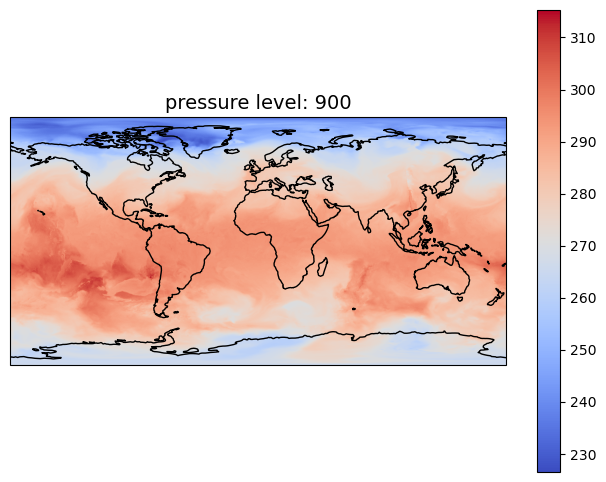

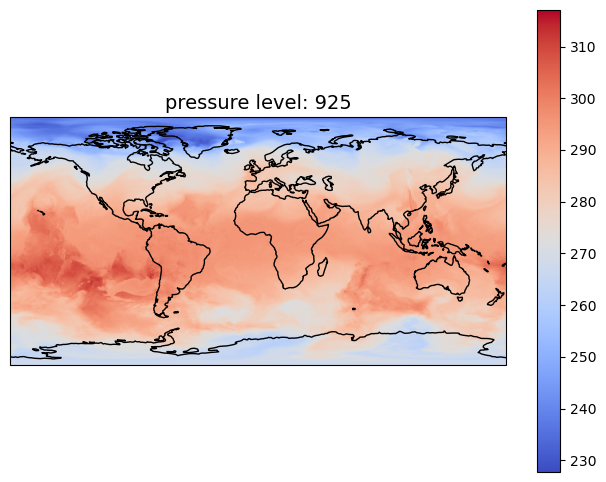

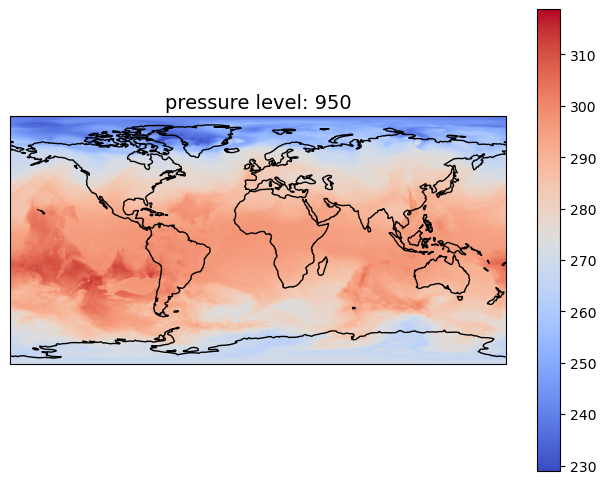

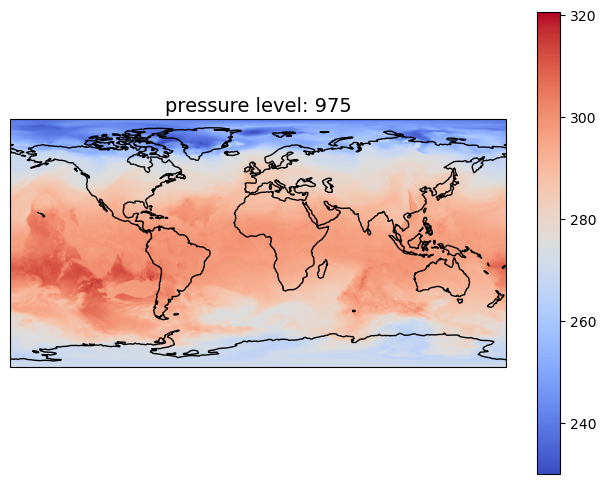

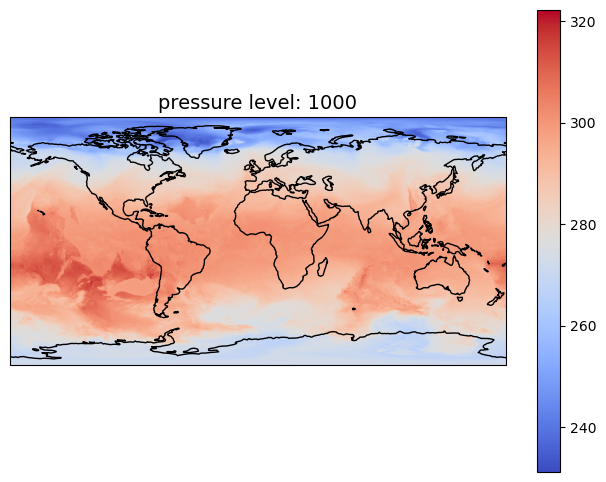

In [7]:
for k in range(0, len(level)):
    plt.figure(figsize=(8, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    im = ax.imshow(temperature[0, k, :, :], 
                   extent=[-180, 180, -90, 90],
                   transform=ccrs.PlateCarree(),
                   cmap='coolwarm',
                   origin='lower')

    # Adding a colorbar for scale reference
    plt.colorbar(im, ax=ax, orientation='vertical')

    # Ensure the map covers the global scale
    ax.set_global()
    
    ax.set_title(f'pressure level: {level[k]}', size=14)
    plt.show()